# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import requests # data gathering
import seaborn as sns
import tweepy #twitter data api
import os
import json


df_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()
df_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:

r=requests.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [3]:
df_imagepred= pd.read_csv('image-predictions.tsv',sep='\t')
df_imagepred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#info for API
# consumer_key = '#'
# consumer_secret = '#'
# access_token = '#'
# access_secret = '#'
# bearer_token='#'
# #Accessing API
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# #creating connection
# api = tweepy.Client(bearer_token=bearer_token)
# print(api)

In [5]:
#list of tweetids
# tweet_ids = df_archive["tweet_id"].astype(list)
# # print(tweet_ids)
# #Ids that are not found get stored to tweet_json.txt
# lost_ids=[]

# with open('tweet_json.txt','w',encoding='UTF-8') as file:
#     for tweet_id in tweet_ids:
#         try:
# #             print('came in here')
#             tweet=api.get_status(tweet_id,tweet_mode='extended')
#             json.dump(tweet._json,file)
#             file.write('\n')
#         except:
# #             print(tweet_id,'Error, Found an lost id')
#             lost_ids.append(tweet_id)
#             print(len(lost_ids))


In [6]:
#because of trouble in pulling tweet data using the tweet ids provided.
#I have used the provided tweet_json.txt file directly in this project
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line) # load tweet
            tweets_data.append(tweet) # Append to list
        except:
            continue
            
#Convert tweets_data list into df_api            
df_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

df_api.head()
# df_api.shape

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


In [7]:
df_api.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [8]:
#using only id, retweet_count and favorite_count
df_trimmed=df_api[['id','retweet_count','favorite_count']]
df_trimmed.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
# we will be using the copies of the dataframes, so that we have backup
#will be used later for visualisation
df_trimmed.to_csv('json_tweet.csv')
df_trimmed_copy=df_trimmed.copy()
df_archive_copy=df_archive.copy()
df_imagepred_copy=df_imagepred.copy()

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Assessing df_archive_copy dataset

In [10]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

As we can see that there are multiple columns with missing values, such as expanded_urls, retweeted_status and reply status columns. We will have to drop them later, as we only need the original images tweets and no retweets and replies.

In [11]:
df_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


We can observe that id column is of integer type, it should be of type string.
Also, the timestamp column should be of datatype datetime object.


In [12]:
df_archive_copy.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
an             7
Toby           7
Daisy          7
Buddy          7
Stanley        6
Scout          6
Dave           6
Milo           6
Oscar          6
Rusty          6
Koda           6
Bella          6
Leo            6
Jack           6
Jax            6
Oakley         5
            ... 
Puff           1
River          1
Tyrus          1
Patch          1
Carbon         1
Grizzie        1
Alejandro      1
Julius         1
Travis         1
Burt           1
Blakely        1
Linus          1
Brooks         1
Ralpher        1
Aqua           1
Shadoe         1
Cannon         1
Pip            1
Emanuel        1
Sailer         1
Frönq          1
Jebberson      1
Sage           1
Sully          1
Sandra         1
Baron          1
Swagger        1
Sailor        

We can see that there are dogs with invalid names such as 'None','a','an','the'

In [13]:
df_archive_copy.tweet_id.nunique()
# As we can see there are no duplicate ids so we dont have to worry about that

2356

In [14]:
#looking at the dog stages 
df_archive_copy[['doggo','floofer','pupper','puppo']].apply(lambda x: True if
    (x[0] == "None" and x[1] == "None" and x[2] == "None" and x[3] =="None") 
    else False, axis = 1).value_counts()

True     1976
False     380
dtype: int64

We basically have 1976 tweet_ids that have None as dog classification.

In [15]:
#looking at denominators ratings
df_archive_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
# we have some rating denominators that are greater than 10
df_archive_copy[df_archive_copy.rating_denominator>10][['text','rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the flo...,70
784,"RT @dog_rates: After so many requests, this is...",11
902,Why does this never happen at my front door......,150
1068,"After so many requests, this is Bretagne. She ...",11
1120,Say hello to this unbelievably well behaved sq...,170
1165,Happy 4/20 from the squad! 13/10 for all https...,20
1202,This is Bluebert. He just saw that both #Final...,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,90
1254,Here's a brigade of puppers. All look very pre...,80


In [17]:
#for displaying the whole text
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)

print(df_archive_copy.query("rating_denominator == '0'").text)


313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object


Looks like the incorrect rating was extracted, there is a correct rating present in the later part of the sentence, 13/10

In [18]:
print(df_archive_copy.query("rating_denominator == '90'").text)
# group of puppies have been rated together

1228    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Name: text, dtype: object


In [19]:
print(df_archive_copy.query("rating_denominator == '16'").text)
#inconsistent rating

1663    I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
Name: text, dtype: object


In [20]:
#looking at numerators now
df_archive_copy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
print(df_archive_copy.query("rating_numerator == '0'").text)

315           When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object


We can observe images that dont have a dog in it, so rating was given as 0

In [22]:
#some instances have multiple urls 
#looking into the expanded_urls 
df_archive_copy[df_archive_copy.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

In [23]:
# we have got 639 expanded urls that have comma in between
#meaning we have got multiple expanded urls 

Quality issues:
- the following columns can be dropped because we dont have any use for them:
   in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, expanded_urls
- tweet id needs to be changed to string type
- the numerator and denominator ratings have inconsistencies.
- the timestamp column should be changed to datetime object.


Tidiness Issues:
- some of the dogs are classified by using more than one dog stages, while some have none for all the possible stages. And should be dropped because of the redundancy they offer.

# Assessing df_imagepred dataset

In [24]:
df_imagepred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_imagepred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- As we can observe there are no missing values in the table, also the img_num column is redundant and could be removed.
- prediction columns have underscore instead of spaces , they also keep fluctuating between lower and uppercase.
- There are some rows that have False for all 3 dog predictions , meaning the image doesnt contain dogs.

In [26]:
# looking at the jpg urls column, if the count is more than 1
# it means that the images are being duplicated, meaning retweets.
df_imagepred.jpg_url.value_counts()

https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                       

As we can see from the counts , some image urls are repeating ,
meaning its either retweeted or a separate tweet with same image.

In [27]:
# no duplicate tweet_id so no worries in that domain
df_imagepred.tweet_id.nunique()

2075

In [28]:
# Returns the instances where all three predictions were false for dog found.
df_imagepred.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


We dont want tweets that dont contain dogs, so we can remove the above instances.

In [29]:
df_imagepred.query("p1_dog == False and (p2_dog ==True  and p3_dog == True)")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk_terrier,0.003913,True
171,668994913074286592,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,1,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True
183,669353438988365824,https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg,1,teddy,0.379656,False,Pembroke,0.212343,True,chow,0.096995,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,Labrador_retriever,0.026854,True


As observed from the above query, we either dont have any dogs in the images or there are some in the backgrounds.

Quality issues:
- tweet id column should be of type str.
- we should remove the img-num column as it is redundant.
- Should images dont contain dogs.

Tidiness issues:

- predictions vary between uppercase, lowercase, and have underscore in between words.

# Assessing df_api dataset

In [30]:
df_trimmed_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [31]:
df_trimmed_copy.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


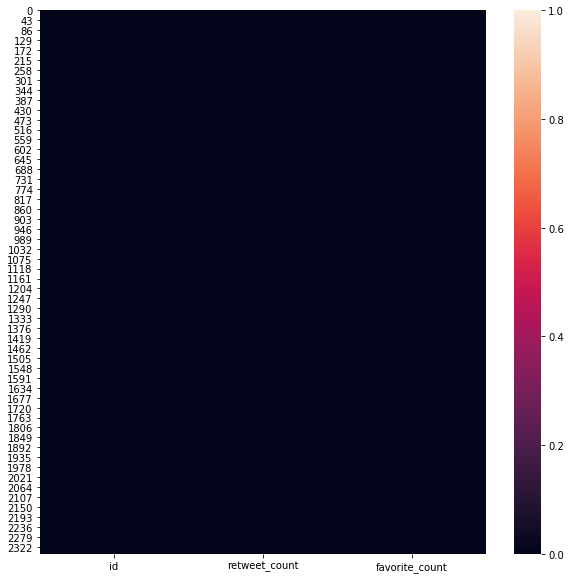

In [32]:
fig, ax= plt.subplots(figsize=(10,10))
ax=sns.heatmap(df_trimmed_copy.isnull(), vmin=0,vmax=1)

As we can see that there are no missing values , 
one quality issue would be that the tweet_id column should be of type str.

### Quality issues

1. Remove the rows that contain the retweet data
- Remove the unnecessary columns
- Incorrect numerator extraction issue
- Cleaning the invalid dog names
- Dropping columns where all predictions are false, and ones where p1 is false and p2 and p3 are less than 30%.
- Fixing the datatypes
- Making the denominator uniform
- Fixing the inconsistencies of the predicted_breed column and optimising the breed prediction columns



### Tidiness issues

1. Some of the dogs are classified by using more than one dog stages, the columns could be brought down to one.
- Merging the datasets

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
# df_archive_copy
# df_imagepred_copy
# df_trimmed_copy


### Cleaning steps:


1. Remove the rows that contain the retweet data
- Some of the dogs are classified by using more than one dog stages, the columns could be brought down to one.
- Remove the unnecessary columns
- Incorrect numerator extraction issue
- Cleaning the invalid dog names
- Dropping columns where all predictions are false, and ones where p1 is false and p2 and p3 are less than 30%.
- Fixing the datatypes
- Merging the datasets
- Making the denominator uniform
- Fixing the inconsistencies of the predicted_breed column and optimising the breed prediction columns


# Cleaning df_archive_copy


In [34]:
df_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


<b>Define</b>

- Remove the rows that contain the retweet data

<b>Code</b>

In [35]:
# Converting retweet columns from integer to string for easier operations
df_archive_copy["in_reply_to_status_id"] = df_archive_copy["in_reply_to_status_id"].astype(str)
df_archive_copy["retweeted_status_id"] = df_archive_copy["retweeted_status_id"].astype(str)

# Storing the indexes of all the reply that are not nan
reply = df_archive_copy[df_archive_copy["in_reply_to_status_id"]!="nan"]["tweet_id"].index


# Removing instances that are reply of a different tweet
df_archive_copy.drop(reply, inplace=True)

# Storing the indexes of all the retweets and dropping the instances
retweets = df_archive_copy[df_archive_copy["retweeted_status_id"]!="nan"]["tweet_id"].index
df_archive_copy.drop(retweets, inplace=True)


<b>Test</b>

In [36]:
# now we have the rows that are not retweets or replies
df_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


<b>Define</b>

Some of the dogs are classified by using more than one dog stages, the columns could be brought down to one.

<b>Code</b>

In [37]:
#First we replace "None" with ""
for x in ["doggo", "floofer", "pupper", "puppo"]:
    df_archive_copy[x].replace("None", "", inplace = True)

#Merging the columns
df_archive_copy['dog_stage'] = df_archive_copy['doggo'].map(str) + df_archive_copy[
    'floofer'].map(str) + df_archive_copy['pupper'].map(str) + df_archive_copy['puppo'].map(str)

In [38]:
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

<b>Test</b>

In [39]:
#1761 Nones 
df_archive_copy.dog_stage.value_counts()

                 1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

<b>Define</b>

Remove the unnecessary columns

<b>Code</b>

In [40]:
# dropping the unnecessary columns
columns_to_delete=['source','doggo','floofer','pupper','puppo','in_reply_to_status_id', 'in_reply_to_user_id', 
                   'retweeted_status_id', 'retweeted_status_user_id', 
                    'retweeted_status_timestamp','expanded_urls']
df_archive_copy.drop(columns=columns_to_delete,inplace=True)

<b>Test</b>

In [41]:
df_archive_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

<b>Define</b>

Incorrect numerator extraction issue

<b>Code</b>

In [42]:
# Checking if there exists a numerator denominator pattern in text
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" 

#https://stackoverflow.com/questions/36028932/how-to-extract-specific-content-in-a-pandas-dataframe-with-a-regex
df_archive_copy["rating"] = df_archive_copy.text.str.extract(pattern, expand = True)[0]

# splitting extracted rating into numerator and denominator columns
df_archive_copy[['numerator', 'denominator']] = df_archive_copy['rating'].str.split('/', n=1, expand=True)

In [43]:
df_archive_copy.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,numerator,denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,,13/10,13,10


In [44]:
#Converting both rating numerator and denominator to string type so that we can compare the extracted vs the built in 
df_archive_copy.rating_numerator = df_archive_copy.rating_numerator.astype("str")
df_archive_copy.rating_denominator = df_archive_copy.rating_denominator.astype("str")

In [45]:
# comparing numerators and storing result in a new column
df_archive_copy['num_result']= df_archive_copy[["rating_numerator", "numerator"]].apply(lambda x: True if (x[0] == x[1]) else False, axis = 1)

In [46]:
df_archive_copy.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,numerator,denominator,num_result
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,,13/10,13,10,True


In [47]:
# Looking at the tweets which had different numerator and extracted numerator
df_archive_copy.query('num_result==False')[['num_result','rating_numerator','numerator']]

,num_result,rating_numerator,numerator
45,False,5,13.5
695,False,75,9.75
763,False,27,11.27
1712,False,26,11.26


In [48]:
#getting the count of multiple numerator denominator patterns in one tweet
df_archive_copy["count_of_multiple"] = df_archive_copy.text.str.count(pattern)

In [49]:
# So we have got 32 tweets with 2 patterns, and 1 with 3 patterns
df_archive_copy.count_of_multiple.value_counts()

1    2070
2      26
3       1
Name: count_of_multiple, dtype: int64

In [50]:
#lets have a look at the text of these tweets
# we can see that most of the times there are more than one dog or even cats in the tweet
df_archive_copy.query('count_of_multiple!=1')[['count_of_multiple','text']]

,count_of_multiple,text
766,2,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ"
1007,2,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
1068,2,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1165,2,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,2,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1222,2,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE
1359,2,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
1459,2,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P"
1465,2,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ
1508,2,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM


In [51]:
#dropping the ones that have multiple pairs
multiple_pair_indexes=df_archive_copy.query('count_of_multiple!=1')[['count_of_multiple','text']].index
df_archive_copy.drop(multiple_pair_indexes,inplace=True)

In [52]:
# None left
df_archive_copy.query('count_of_multiple!=1')[['count_of_multiple','text']]

,count_of_multiple,text


In [53]:
#Getting the indexes to be swapped with the correct numerator
indexes_to_swap=df_archive_copy.query('num_result==False')[['num_result','rating_numerator','numerator']].index
values_to_swap=df_archive_copy.query('num_result==False').numerator.astype("float64")

In [54]:
# Swapping step
df_archive_copy.rating_numerator = df_archive_copy.rating_numerator.astype("float64")
df_archive_copy.rating_denominator = df_archive_copy.rating_denominator.astype("float64")
#impute the data
df_archive_copy.loc[indexes_to_swap, "rating_numerator"] = values_to_swap
df_archive_copy.loc[indexes_to_swap].rating_numerator

45      13.50
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

<b>Test</b>

In [55]:
#We no longer face the issue

df_archive_copy.query('count_of_multiple!=1')[['count_of_multiple','text']]

,count_of_multiple,text


<b>Define</b>

Cleaning the invalid dog names

<b>Code</b>

In [56]:
# Cleaning the invalid dog names
for x in ["None", "a","an", "by", "the","my"]:
    df_archive_copy["name"].replace(x, np.nan, inplace = True)

In [57]:
df_archive_copy.name.value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Lola          8
Sadie         8
Winston       8
Toby          7
Daisy         7
Jax           6
Stanley       6
Bella         6
Bailey        6
Oscar         6
Bo            6
Koda          6
Milo          5
Buddy         5
Scout         5
Bentley       5
Rusty         5
Dave          5
Chester       5
Louis         5
Leo           5
Larry         4
very          4
Winnie        4
             ..
Dido          1
Puff          1
Jamesy        1
River         1
Darla         1
Kirk          1
Tobi          1
Sailor        1
Filup         1
Rizzo         1
Aja           1
Burt          1
Blakely       1
Linus         1
Brooks        1
Ralpher       1
Aqua          1
Shadoe        1
Cannon        1
Pip           1
Ito           1
Emanuel       1
Frönq         1
Jebberson     1
Sage          1
Sully         1
Sandra        1
Baron         1
Swagger       1
Dewey         1
Name: name, Length: 936,

In [58]:
# we can still the keep the instances where the dog name is NaN, as it doesnt make any difference
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2070 non-null int64
timestamp             2070 non-null object
text                  2070 non-null object
rating_numerator      2070 non-null float64
rating_denominator    2070 non-null float64
name                  1408 non-null object
dog_stage             2070 non-null object
rating                2070 non-null object
numerator             2070 non-null object
denominator           2070 non-null object
num_result            2070 non-null bool
count_of_multiple     2070 non-null int64
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 276.1+ KB


<b>Test</b>

In [59]:
df_archive_copy.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,numerator,denominator,num_result,count_of_multiple
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,,13/10,13,10,True,1


<b>Define</b>

Dropping the img_num column

<b>Code</b>

In [60]:
df_imagepred_copy.drop(columns=('img_num'),inplace=True)

<b>Test</b>

In [61]:
df_imagepred_copy.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


<b>Define</b>

Dropping columns where all predictions are false, and ones where p1 is false and p2 and p3 are less than 30%.

<b>Code</b>

In [62]:
# removing rows with all three predictions for dog as False
#storing the indexes for all predictions as false
all_false=df_imagepred_copy[(df_imagepred_copy["p1_dog"] == False) &
         (df_imagepred_copy["p2_dog"] == False) &
         (df_imagepred_copy["p3_dog"] == False)]["tweet_id"].index
#storing indexes for p2 p3 confidence less than 30% and p1 prediction as false
low_conf=df_imagepred_copy[(df_imagepred_copy["p1_dog"] == False) &
         (df_imagepred_copy["p2_conf"] < 0.30) &
         (df_imagepred_copy["p3_conf"] < 0.30)]["tweet_id"].index
# as both the indexes can be same , we have to append the index lists
rows_to_delete=all_false.append(low_conf)
df_imagepred_copy.drop(rows_to_delete,inplace=True)


<b>Test</b>

In [63]:
#No more All false prediction tweets
df_imagepred_copy[(df_imagepred_copy["p1_dog"] == False) &
         (df_imagepred_copy["p2_dog"] == False) &
         (df_imagepred_copy["p3_dog"] == False)]["tweet_id"].index

Int64Index([], dtype='int64')

<b>Define</b>

Fixing the datatypes

<b>Code</b>

In [64]:
# Converting tweet_id to str
df_archive_copy["tweet_id"] = df_archive_copy["tweet_id"].astype("str")

In [65]:
df_imagepred_copy["tweet_id"] = df_imagepred_copy["tweet_id"].astype("str")

In [66]:
# so that we can merge
df_trimmed_copy["id"] = df_trimmed_copy["id"].astype("str")
df_trimmed_copy.rename({"id": "tweet_id"}, axis=1, inplace=True)

In [67]:
df_trimmed_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [68]:
df_archive_copy["timestamp"] = pd.to_datetime(df_archive_copy.timestamp)

<b>Test</b>

In [69]:
#dtypes fixed
df_trimmed_copy.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

In [70]:
#dtypes fixed
df_archive_copy.dtypes

tweet_id                      object
timestamp             datetime64[ns]
text                          object
rating_numerator             float64
rating_denominator           float64
name                          object
dog_stage                     object
rating                        object
numerator                     object
denominator                   object
num_result                      bool
count_of_multiple              int64
dtype: object

<b>Define</b>

Merging the datasets

<b>Code</b>

In [71]:
df_trimmed_copy = df_trimmed_copy.rename(columns={'id': 'tweet_id'})
# Merging all the datasets into one and performing the remaining cleaning operations
df_temp = df_archive_copy.merge(df_trimmed_copy, how="inner", on="tweet_id").copy()

# We only want unique instances
df_temp.drop_duplicates(inplace=True)

# Merging all datasets into one now
df_merged = df_temp.merge(df_imagepred_copy, how="inner", on="tweet_id").copy()

# Removing the duplicate tweets
df_merged.drop_duplicates(subset='text', keep="first", inplace=True)


<b>Test</b>

In [72]:
#merged dataset
df_merged.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,numerator,denominator,num_result,count_of_multiple,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,,13/10,13,10,True,1,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [73]:
#merged dataset info
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1446
Data columns (total 24 columns):
tweet_id              1447 non-null object
timestamp             1447 non-null datetime64[ns]
text                  1447 non-null object
rating_numerator      1447 non-null float64
rating_denominator    1447 non-null float64
name                  1054 non-null object
dog_stage             1447 non-null object
rating                1447 non-null object
numerator             1447 non-null object
denominator           1447 non-null object
num_result            1447 non-null bool
count_of_multiple     1447 non-null int64
retweet_count         1447 non-null int64
favorite_count        1447 non-null int64
jpg_url               1447 non-null object
p1                    1447 non-null object
p1_conf               1447 non-null float64
p1_dog                1447 non-null bool
p2                    1447 non-null object
p2_conf               1447 non-null float64
p2_dog                1447 n

<b>Define</b>

Making the denominator uniform

<b>Code</b>

In [74]:
#Keeping only the rows that contain text rating denominator as 10 for easier differentiation.
df_merged_10 = df_merged.text.str.contains("\d+/10")

# Dropping rows that dont have denominator as 10
df_merged = df_merged[df_merged_10].copy()

# Extracting numerators 
df_merged_10 = df_merged.text.str.extract("(\d+/10)", expand=False).copy()
# print(df_merged_10)
df_merged["rating_numerator"] = df_merged_10.apply(lambda x: int(str(x)[:-3]))
df_merged["rating_denominator"] = 10



<b>Test</b>

In [75]:
df_merged.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,numerator,denominator,num_result,count_of_multiple,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
587,748932637671223296,2016-07-01 17:33:49,Say hello to Divine Doggo. Must be magical af. 13/10 would be an honor to pet https://t.co/BbcABzohKb,13,10,Divine,doggo,13/10,13,10,True,1,2564,6461,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,borzoi,0.742912,True,wire-haired_fox_terrier,0.204082,True,English_setter,0.021032,True
467,772826264096874500,2016-09-05 15:58:34,Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,11,10,Roosevelt,,11/10,11,10,True,1,2669,8842,https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg,basset,0.915351,True,Walker_hound,0.072416,True,beagle,0.008229,True
422,783334639985389568,2016-10-04 15:55:06,This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu,12,10,Dave,,12/10,12,10,True,1,13616,32651,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True


<b>Define</b>

Fixing the inconsistencies of the predicted_breed column and optimising the breed prediction columns

<b>Code</b>

In [76]:
# we no longer need the probability and confidence columns,so dropping them
df_merged.drop(columns=["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_dog", "p3_conf", "p2", "p3"], inplace=True)

# Rename p1 to Predicted_Breed
df_merged.rename(columns={"p1": "Predicted_Breed"}, inplace=True)

# Fixing the underscore in the breed names and the lower and uppercase inconsistencies
df_merged["Predicted_Breed"] = df_merged["Predicted_Breed"].apply(lambda x: x.lower().replace("_", " "))




<b>Test</b>

In [77]:
df_merged.head(1)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,numerator,denominator,num_result,count_of_multiple,retweet_count,favorite_count,jpg_url,Predicted_Breed
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,,13/10,13,10,True,1,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua


In [78]:
df_merged_copy=df_merged.copy()
# dropping the rows with name as NaN 
df_merged_copy.dropna(inplace=True)

In [79]:
#final clean dataset
df_merged_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 0 to 1425
Data columns (total 16 columns):
tweet_id              1053 non-null object
timestamp             1053 non-null datetime64[ns]
text                  1053 non-null object
rating_numerator      1053 non-null int64
rating_denominator    1053 non-null int64
name                  1053 non-null object
dog_stage             1053 non-null object
rating                1053 non-null object
numerator             1053 non-null object
denominator           1053 non-null object
num_result            1053 non-null bool
count_of_multiple     1053 non-null int64
retweet_count         1053 non-null int64
favorite_count        1053 non-null int64
jpg_url               1053 non-null object
Predicted_Breed       1053 non-null object
dtypes: bool(1), datetime64[ns](1), int64(5), object(9)
memory usage: 132.7+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [80]:
df_merged_copy.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [81]:
df=pd.read_csv('twitter_archive_master.csv')

In [82]:
df.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,numerator,denominator,num_result,count_of_multiple,retweet_count,favorite_count,jpg_url,Predicted_Breed
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,13/10,13.0,10,True,1,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 16 columns):
tweet_id              1053 non-null int64
timestamp             1053 non-null object
text                  1053 non-null object
rating_numerator      1053 non-null int64
rating_denominator    1053 non-null int64
name                  1053 non-null object
dog_stage             136 non-null object
rating                1053 non-null object
numerator             1053 non-null float64
denominator           1053 non-null int64
num_result            1053 non-null bool
count_of_multiple     1053 non-null int64
retweet_count         1053 non-null int64
favorite_count        1053 non-null int64
jpg_url               1053 non-null object
Predicted_Breed       1053 non-null object
dtypes: bool(1), float64(1), int64(7), object(7)
memory usage: 124.5+ KB


In [84]:
df.Predicted_Breed.value_counts()

golden retriever                  92
labrador retriever                65
pembroke                          63
chihuahua                         59
pug                               40
chow                              32
toy poodle                        28
pomeranian                        24
samoyed                           23
french bulldog                    22
malamute                          22
cocker spaniel                    19
siberian husky                    18
miniature pinscher                16
staffordshire bullterrier         16
chesapeake bay retriever          16
shih-tzu                          15
german shepherd                   14
cardigan                          14
shetland sheepdog                 14
beagle                            13
eskimo dog                        12
pekinese                          11
italian greyhound                 11
old english sheepdog              11
vizsla                            10
american staffordshire terrier    10
b

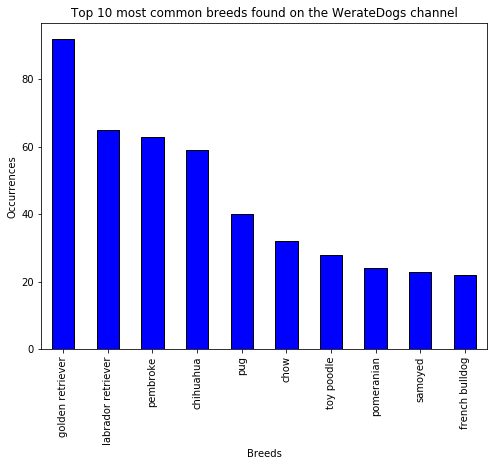

In [85]:
# Plotting the top 10 most common breeds on the WeRatedogs channel.
fig, ax = plt.subplots(figsize=(8,6))

names = df['Predicted_Breed']
names.value_counts().head(10).plot(kind = 'bar',color='b', ax = ax, edgecolor = ['Black']*len(names))
plt.xlabel('Breeds')
plt.ylabel('Occurrences')
plt.title('Top 10 most common breeds found on the WerateDogs channel')
plt.savefig('common_plot.jpg',dpi=800,bbox_inches='tight')
plt.show();

Insight 1
- We can observe that golden retriever is one of the most common dog breed found in the weratedogs dataset.

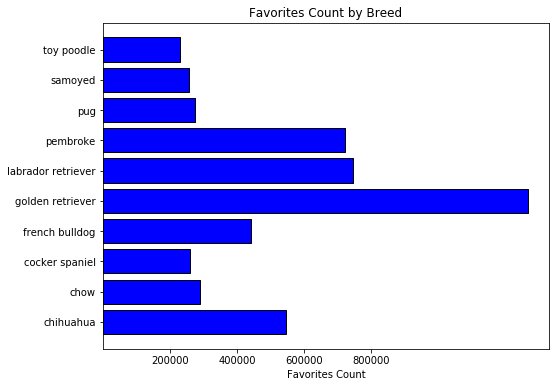

In [86]:
# Now lets see what the top 10 most favorite breeds of dogs are according to the dataset 
df_favoritebreeds = df.groupby('Predicted_Breed')['favorite_count'].sum().reset_index()
df_sorted = df_favoritebreeds.sort_values('favorite_count', ascending=False).head(10)
sorted_favorites = df_sorted['favorite_count']
sorted_breeds = df_sorted['Predicted_Breed']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(sorted_breeds, sorted_favorites, color = "b", edgecolor = ['Black']*len(sorted_breeds))

plt.xlabel('Favorites Count')
plt.title('Favorites Count by Breed')
plt.xticks(np.arange(200000, 1000000, 200000))
plt.savefig('favorite_plot.jpg',dpi=800,bbox_inches='tight')
plt.show();


Insight 2
- Again, no surprise here , the most favorited breed of dogs was found to be golden retriever, Second most favorite was the Labrador Retriever alongside pembroke.

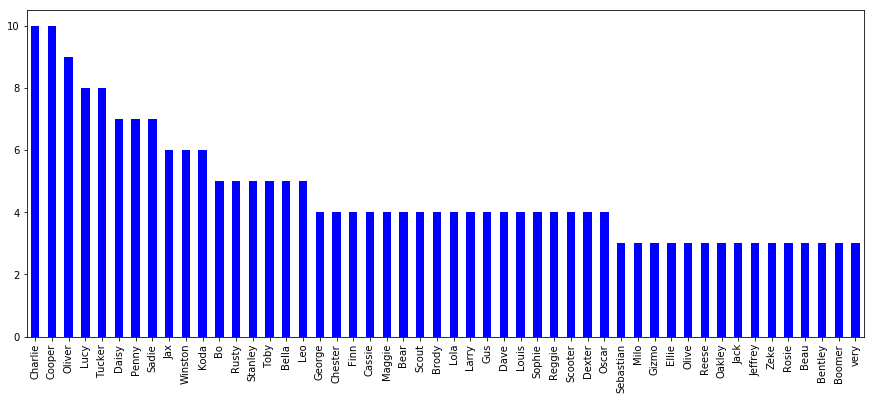

In [87]:
# Lets look at what the most common names are for the dog breeds found in the dataset.
fig, ax = plt.subplots(figsize=(15,6))

names = df['name']
names.value_counts().head(50).plot(kind = 'bar', color = "b", ax = ax, )
plt.savefig('commonnames_plot.jpg',dpi=1000,bbox_inches='tight')
plt.show();


Insight 3
- Looks like Charlie and Cooper are the most common names amounting to 10 instances each in the dataset.